# 0. Setup Paths

In [1]:
#R
import os

In [2]:
#R
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
#R
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
#R
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
import object_detection

# 2. Create Label Map

In [6]:
#R
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 5. Update Config For Transfer Learning

In [7]:
#R
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [8]:
#R
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [9]:
#R
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [10]:
#R
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [11]:
#R
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 8. Load Train Model From Checkpoint

In [12]:
#R
import os
import tensorflow as tf
import object_detection
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [13]:
#R
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-12')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 8.1 File saving to Database

In [14]:
#R
from pytz import timezone 
from datetime import datetime
from datetime import date

In [15]:
#R
import os
from backend.allFunctions import *

# test()
# plate_num = "ABCD"
# print(checkOwner(plate_num))
# print(checkEntryOrExit(plate_num))
# print(getCount("ABC "))

In [16]:
#R
vehicle_count = int(0)

In [17]:
import os
from backend.allFunctions import *
from datetime import datetime
today_date = datetime.now()
date_and_time = datetime.now().strftime("%d-%m-%Y %H") + ':00'
print(date_and_time)
prev = 0
# updateCSV(60, (today_date.strftime("%d-%m-%Y %H") + ':00'))
# updateCSV(216, (today_date.strftime("%d-%m-%Y %H") + ':00'))
# updateCSV(546, (today_date.strftime("%d-%m-%Y %H") + ':00'))
# updateCSV(45, (today_date.strftime("%d-%m-%Y %H") + ':00'))
# updateCSV(219, (today_date.strftime("%d-%m-%Y %H") + ':00'))
# updateCSV(2, (today_date.strftime("%d-%m-%Y %H") + ':00'))
# updateCSV(25, (today_date.strftime("%d-%m-%Y %H") + ':00'))
# updateCSV(29, (today_date.strftime("%d-%m-%Y %H") + ':00'))


16-09-2022 09:00


# CSV Dummy Data

In [18]:
# updateCSV(8,'24-07-2022 8:00')
# updateCSV(60,'24-07-2022 9:00')
# updateCSV(122,'24-07-2022 10:00')
# updateCSV(170,'24-07-2022 11:00')
# updateCSV(191,'24-07-2022 12:00')
# updateCSV(156,'24-07-2022 13:00')
# updateCSV(188,'24-07-2022 14:00')
# updateCSV(179,'24-07-2022 15:00')
# updateCSV(111,'24-07-2022 16:00')

# updateCSV(4,'26-07-2022 8:00')
# updateCSV(54,'26-07-2022 9:00')
# updateCSV(114,'26-07-2022 10:00')
# updateCSV(156,'26-07-2022 11:00')
# updateCSV(185,'26-07-2022 12:00')
# updateCSV(141,'26-07-2022 13:00')
# updateCSV(166,'26-07-2022 14:00')
# updateCSV(179,'26-07-2022 15:00')
# updateCSV(112,'26-07-2022 16:00')

# updateCSV(7,'27-07-2022 8:00')
# updateCSV(78,'27-07-2022 9:00')
# updateCSV(131,'27-07-2022 10:00')
# updateCSV(167,'27-07-2022 11:00')
# updateCSV(188,'27-07-2022 12:00')
# updateCSV(156,'27-07-2022 13:00')
# updateCSV(187,'27-07-2022 14:00')
# updateCSV(133,'27-07-2022 15:00')
# updateCSV(91,'27-07-2022 16:00')

# updateCSV(19,'28-07-2022 8:00')
# updateCSV(96,'28-07-2022 9:00')
# updateCSV(141,'28-07-2022 10:00')
# updateCSV(157,'28-07-2022 11:00')
# updateCSV(178,'28-07-2022 12:00')
# updateCSV(186,'28-07-2022 13:00')
# updateCSV(197,'28-07-2022 14:00')
# updateCSV(143,'28-07-2022 15:00')
# updateCSV(100,'28-07-2022 16:00')

In [19]:
# updateCSV(186,'28-07-2022 13:00')

# Random number plate generator

In [20]:
# import random

In [21]:
# state_code = ['DL','JK','KL','MH','KA']

In [22]:
# rand_plate = ""
# plate_list = []


In [23]:
# for i in range(200):
#     rand_plate = ""
#     rand_plate += str(state_code[random.randint(0, 4)]) + str(random.randint(1, 70))
#     rand_plate += chr(random.randint(65,90)) + chr(random.randint(65,90))
#     rand_plate += str(random.randint(0,9999))
#     print(rand_plate)
#     plate_list.append(rand_plate)
# print(plate_list)

In [24]:
#R
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
# from google.cloud import firestore

cred = credentials.Certificate("credentials/serviceAccountKey.json")
firebase_admin.initialize_app(cred)
db = firestore.client()    

clearTodaysEntryExitDetails()
def cloud_store(plate_num, vehicle_count):
    
    whose = checkOwner(plate_num)
    
    EntryOrExit = checkEntryOrExit(plate_num)
    print(EntryOrExit)
    
    current_date = date.today().strftime("%d-%m-%Y")
    print("Test phase : " + current_date)
    current_time = datetime.now(timezone("Asia/Kolkata")).strftime("%H:%M:%S")
    week_day = datetime.now().strftime('%A')
    collect = db.collection(str(current_date)).document(plate_num)
    print("Test phase : collect")
    
    if collect.get().exists:
        print("Found")
    else:
        print("Not found")
        collect.set({'plate_num':plate_num})
    prediction_result_array = get_predicted_values()
    print(prediction_result_array)
    db.collection('prediction_result').document('predicted_value_of_' + current_date).set({
        '8AM - 9AM': prediction_result_array[0],
        '9AM - 10AM': prediction_result_array[1],
        '10AM - 11AM': prediction_result_array[2],
        '11AM - 12PM': prediction_result_array[3],
        '12PM - 1PM': prediction_result_array[4],
        '1PM - 2PM': prediction_result_array[5],
        '2PM - 3PM': prediction_result_array[6],
        '3PM - 4PM': prediction_result_array[7]
    })
    if not db.collection('number_of_vehicles_inside').document('number_of_vehicles_inside_' + current_date).get().exists:
        vehicle_count = 0
    
    if(EntryOrExit == "entry"):
        #create
        entry_time = current_time
        exit_time = "NULL"
        vehicle_count += 1
        print("Test phase : The if entryOrExit is working fine")
        
        collect.update({
            'plate_num':plate_num,
            'details' : {'date':current_date, 'week_day':week_day, 'entry_time':entry_time, 'exit_time':exit_time, 'EntryOrExit':EntryOrExit, 'whose':whose}
        })
        
        local_store(plate_num, current_date, week_day, entry_time, exit_time, EntryOrExit, whose)
        db.collection('number_of_vehicles_inside').document('number_of_vehicles_inside_' + current_date).set({
            'number_of_vehicles_inside_now': vehicle_count
        })
        print(plate_num, current_date, week_day, entry_time, exit_time, EntryOrExit, whose, vehicle_count)
        
    else :
        vehicle_count -= 1
        #update
        exit_time = current_time
        entry_time = "NULL"
        collect.update({
            'details.exit_time': exit_time, 
            'details.EntryOrExit': EntryOrExit
        })
        db.collection('number_of_vehicles_inside').document('number_of_vehicles_inside_' + current_date).set({
            'number_of_vehicles_inside_now': vehicle_count
        })
        local_store(plate_num, current_date, week_day, entry_time, exit_time, EntryOrExit, whose)
        print(plate_num, current_date, week_day, entry_time, exit_time, EntryOrExit, whose, vehicle_count)
    return "OK", vehicle_count


In [25]:
# import time

# from datetime import date
 
# # calling the today
# # function of date class
# today = date.today()
# print(today)

In [26]:
# status, vehicle_count = cloud_store("JK7OG9585", vehicle_count)

In [27]:
# status, vehicle_count = cloud_store("KL34MW8138", vehicle_count)

In [28]:
# status, vehicle_count = cloud_store("MH70IZ2823", vehicle_count)

In [29]:
status, vehicle_count = cloud_store("MH59FH1433", vehicle_count)

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
MH59FH1433 16-09-2022 Friday 09:49:28 NULL entry mace 1


In [30]:
plate_list = ['DL15JU4861', 'MH49IF6209', 'DL5HX8829', 'DL10XX9568', 'KL30UJ6131', 'JK60HD2648', 'JK19RX2337', 'KA64OI824', 'KA28HH4118', 'DL65LS2055', 'JK26CD4690', 'JK63PA6656', 'KL70KM3348', 'JK62UP125', 'KL49ZZ5876', 'KL42FZ8247', 'DL32DP1109', 'KL58ZC2170', 'DL5QS1699', 'MH29YP2925', 'JK1MI7001', 'KA49OF7249', 'KA30ON3211', 'KA16RA3510', 'JK59KF4487', 'KA4IF8567', 'KL54ET4362', 'MH18BK3562', 'KA50QN6891', 'DL45QN8651', 'DL6CO216', 'DL7QE8776', 'MH4KN77', 'KL4TU8480', 'DL69RV8394', 'DL35HO6858', 'DL34OD8695', 'DL56EB5349', 'DL53BO5255', 'DL55OZ6067', 'KL60AD4234', 'DL69RL7917', 'JK12WD7470', 'KL12KC5208', 'JK5WP6498', 'JK1HU7348', 'JK26TG3646', 'DL41SR882', 'MH69MO1440', 'KL6QS5906'] 
print(plate_list[8])
print(len(plate_list))

KA28HH4118
50


In [31]:
# import time
# import random
# l = len(plate_list)
# for i in range(100):
#     j = random.randint(0,l);
#     status, vehicle_count = cloud_store(plate_list[j], vehicle_count)
#     print(j)
#     time.sleep(3)

In [32]:
# import time
# status, vehicle_count = cloud_store('DL15JU4861', vehicle_count)
# for i in range(10):
#     status, vehicle_count = cloud_store('DL15JU4861', vehicle_count)
#     time.sleep(3)

In [33]:
# status, vehicle_count = cloud_store('MH49IF6209', vehicle_count)

In [34]:
# status, vehicle_count = cloud_store('DL5HX8829', vehicle_count)

In [35]:
# status, vehicle_count = cloud_store('KL03H7621', vehicle_count)

In [36]:
# status, vehicle_count = cloud_store('21BH0001AA', vehicle_count)

In [37]:
print(vehicle_count)

1


# 9. Detect from an Image

In [38]:
#R
import cv2 
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
# !pip list

In [40]:
#R
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [41]:
#detections.keys()

# Apply OCR to Detection

In [42]:
#R
import easyocr

In [43]:
detection_threshold = 0.7

# OCR Filtering

In [44]:
#R
region_threshold = 0.05

In [45]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

# Bring it Together

In [46]:
#R
region_threshold = 0.6

In [47]:
#R
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
#         plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
#         plt.show()
#         print(text)
        detected_plate = "".join(map(str,text)).upper().replace("I","1").replace("Z","2").replace("O","0").replace(" ","").replace("M","H")
#         print(detected_plate)
        return detected_plate, region

# Save Results

In [48]:
#R
import csv
import uuid

In [49]:
'{}.jpg'.format(uuid.uuid1())

'c7489752-3576-11ed-9836-48e7daad2ad6.jpg'

In [50]:
#R
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

# 9.Alert

In [51]:
# date


In [52]:
#Alert function
# def func():
#     e = datetime.datetime.now()
#     print ("The time is now: = %s:%s:%s" % (e.hour, e.minute, e.second))
#     schedule.every(0.2).minutes.do(func)
#     schedule.run_pending()
#     time.sleep(0.2)

# 10. Real Time Detections from Webcam

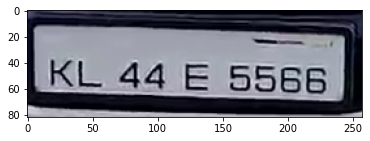

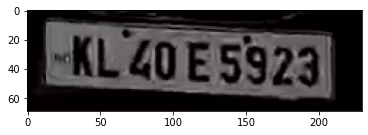

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
KL20E5923] 16-09-2022 Friday 09:58:34 NULL entry outsider 2
KL20E5923]
9
['200', 2, '16-09-2022 09:00']


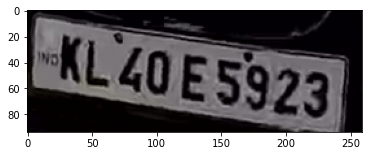

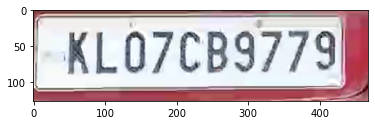

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
KL07CB9779 16-09-2022 Friday 09:58:45 NULL entry mace 3
KL07CB9779
9


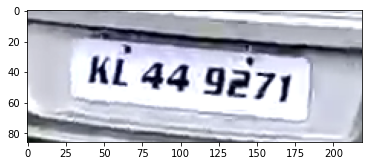

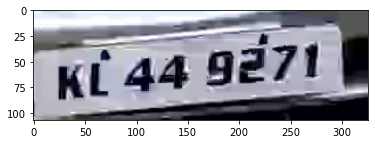

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
KC449271 16-09-2022 Friday 10:00:05 NULL entry outsider 4
KC449271
10
['200', 4, '16-09-2022 10:00']


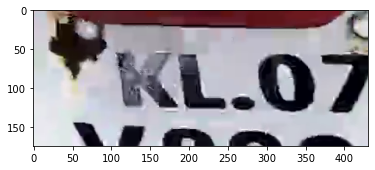

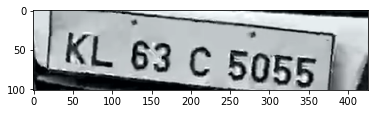

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
KL63C5055 16-09-2022 Friday 10:03:24 NULL entry outsider 5
KL63C5055
10


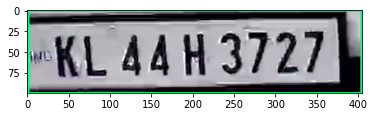

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
"KL44H3727 16-09-2022 Friday 10:03:35 NULL entry outsider 6
"KL44H3727
10


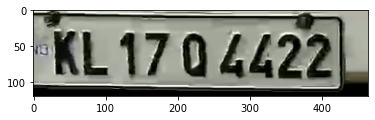

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
KL1204L22] 16-09-2022 Friday 10:03:42 NULL entry outsider 7
KL1204L22]
10


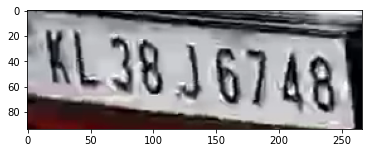

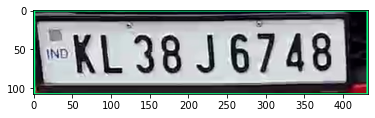

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
KL38J6748 16-09-2022 Friday 10:03:54 NULL entry outsider 8
KL38J6748
10


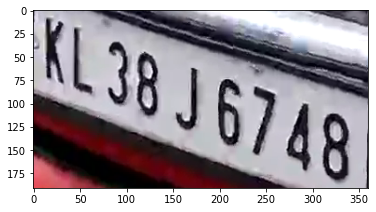

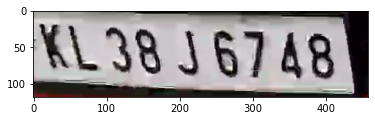

entry
Test phase : 16-09-2022
Test phase : collect
Found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
KL38J6748 16-09-2022 Friday 10:05:01 NULL entry outsider 9
KL38J6748
10


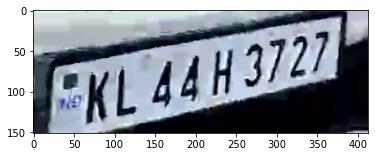

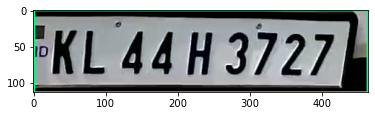

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
KL44H3727 16-09-2022 Friday 10:05:27 NULL entry outsider 10
KL44H3727
10


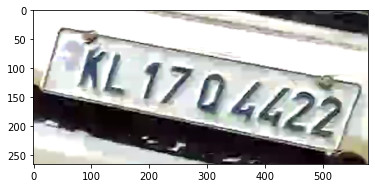

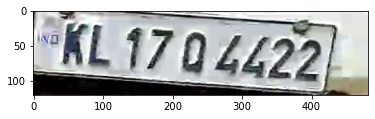

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
0L170LL22 16-09-2022 Friday 10:05:51 NULL entry outsider 11
0L170LL22
10


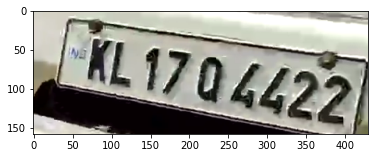

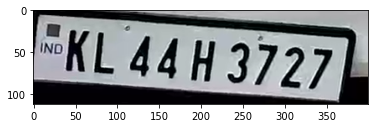

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
#KLAAH3727 16-09-2022 Friday 10:06:03 NULL entry outsider 12
#KLAAH3727
10


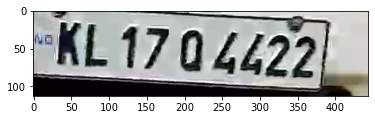

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
KL170LL22] 16-09-2022 Friday 10:06:13 NULL entry outsider 13
KL170LL22]
10


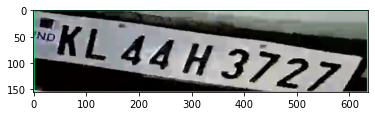

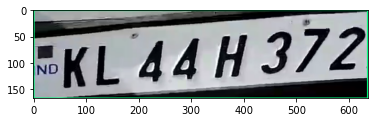

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
KLAAH372 16-09-2022 Friday 10:07:18 NULL entry outsider 14
KLAAH372
10


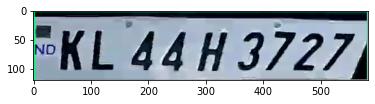

entry
Test phase : 16-09-2022
Test phase : collect
Found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
KL44H3727 16-09-2022 Friday 10:07:30 NULL entry outsider 15
KL44H3727
10


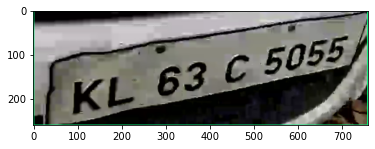

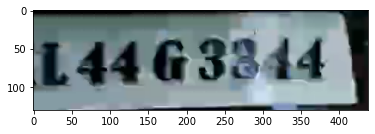

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
14463344 16-09-2022 Friday 10:10:34 NULL entry outsider 16
14463344
10


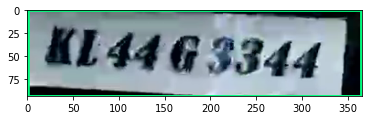

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
[L44G3344 16-09-2022 Friday 10:10:43 NULL entry outsider 17
[L44G3344
10


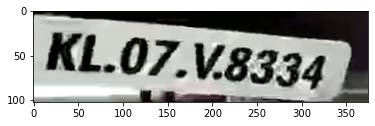

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
KL.02V8334 16-09-2022 Friday 10:10:57 NULL entry outsider 18
KL.02V8334
10


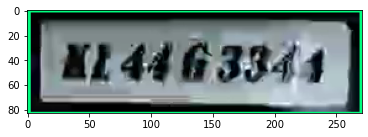

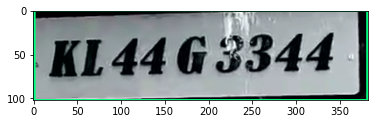

entry
Test phase : 16-09-2022
Test phase : collect
Not found
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
[96.0, 70.0, 39.0, 15.0, 4.0, 21.0, 6.0, 10.0, 44.0, 96.0]
Test phase : The if entryOrExit is working fine
KL4463344 16-09-2022 Friday 10:11:31 NULL entry outsider 19
KL4463344
10


In [53]:
## R
prev_plate = "hello"
prev_hour = 0

# Live capture
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    
while cap.isOpened():
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    
    try: 
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        text = "".join(map(str,text)).upper().replace(" ","")
        #text = "".join(map(str,text)).upper().replace("I","1").replace("Z","2").replace("O","0").replace(" ","").replace("M","H")
        if(prev_plate != text):
            save_results(text, region, 'realtimeresults.csv', 'Detection_Images')
            prev_plate = text
            plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
            plt.show()
            status, vehicle_count = cloud_store(text, vehicle_count)
            print(text)
            
            today_date = datetime.now()
            print(today_date.hour)
            hour = int(today_date.hour)
            if(hour != prev_hour):
                updateCSV(vehicle_count, (today_date.strftime("%d-%m-%Y %H") + ':00'))
                prev_hour = hour 
    except:
        pass

    cv2.imshow('object detection', cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break